In [9]:
import ydata_profiling
import pandas as pd
from pathlib import Path
import os

In [10]:
DATA_PATH = Path("/workspaces/husqvarna/data/dataset.csv")
REPORT_PATH = Path("/workspaces/husqvarna/data/report.html")

In [11]:
df = pd.read_csv(DATA_PATH, sep=';')

In [12]:
profile = ydata_profiling.ProfileReport(df)

os.makedirs(REPORT_PATH.parent, exist_ok=True)
profile.to_file(REPORT_PATH)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 78.41it/s]


In [13]:
# Creating separate report for malfunction versus non-malfunction
malfunction_df = df[df['malfunction'] == 1]
non_malfunction_df = df[df['malfunction'] == 0]

malfunction_profile = ydata_profiling.ProfileReport(malfunction_df)
non_malfunction_profile = ydata_profiling.ProfileReport(non_malfunction_df)

malfunction_report_path = REPORT_PATH.parent / 'malfunction_report.html'
non_malfunction_report_path = REPORT_PATH.parent / 'non_malfunction_report.html'

malfunction_profile.to_file(malfunction_report_path)
non_malfunction_profile.to_file(non_malfunction_report_path)

/usr/local/python/3.12.9/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 119.51it/s]
/usr/local/python/3.12.9/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 70.96it/s]


In [14]:
import numpy as np

# normalizing the data
FEATURES = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7",  "feature9"]
SKEWED_FEATURES = ["feature2", "feature3", "feature4", "feature7", "feature9"]
X = df[FEATURES]


for feature in SKEWED_FEATURES:
    X[feature] = X[feature].apply(lambda x: np.sqrt(x))

X = (X - X.mean()) / X.std()

report = ydata_profiling.ProfileReport(X)
report.to_file(REPORT_PATH.parent / 'normalized_report.html')

/tmp/ipykernel_87411/827370697.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].apply(lambda x: np.sqrt(x))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 108.88it/s]


In [15]:
# using t-SNE to visualize the data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_jobs=-1)
X_embedded = tsne.fit_transform(X)


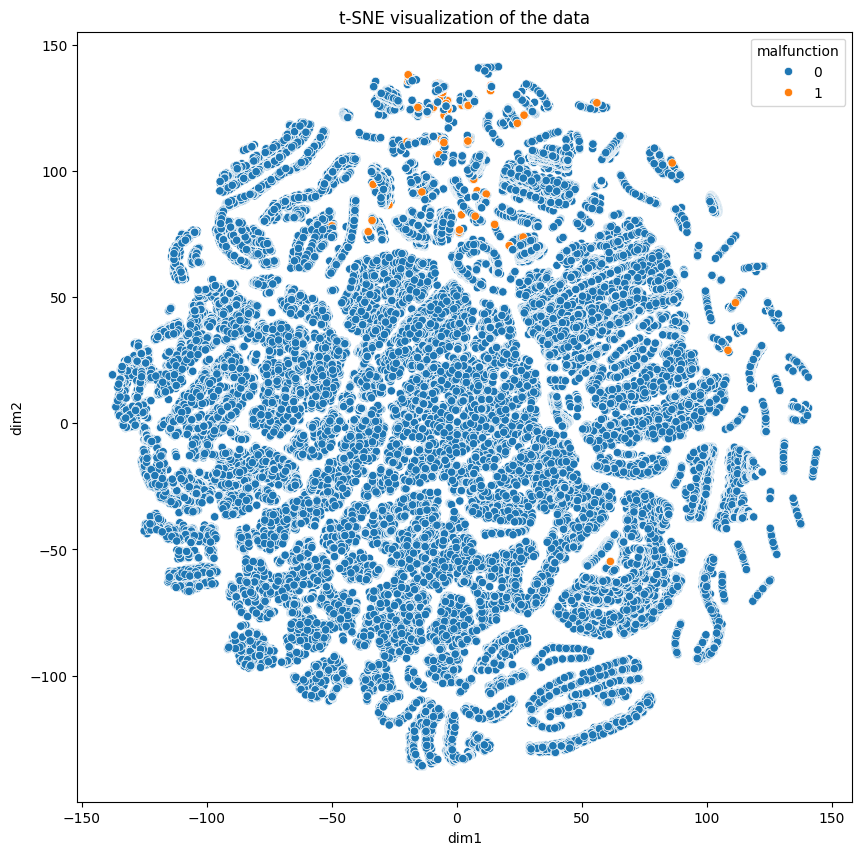

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# Assuming X_embedded is a numpy array or DataFrame
# Convert X_embedded to a DataFrame if it is not already
if not isinstance(X_embedded, pd.DataFrame):
    X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])

# Combine X_embedded with the malfunction column
X_embedded['malfunction'] = df['malfunction'].values

plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_embedded, x='dim1', y='dim2', hue='malfunction')
plt.title("t-SNE visualization of the data")
plt.show()